Aplique as principais etapas: pré-processamento, treinamento e teste para classificação de cancer de mâma. 

In [0]:
#base de dados: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [0]:
import pandas as pd
from scipy.io import arff

In [0]:
dados_f = arff.loadarff('PhishingData.arff')

In [0]:
dados_phishing = pd.DataFrame(dados_f[0], dtype=float)

In [0]:
#dados_phishing = pd.read_csv('https://raw.githubusercontent.com/bethmorais/aed-md-mp/master/datasets_phishing.csv')
##dados_phishing = pd.read_table('PhishingData.arff')

In [135]:
dados_phishing.head(20)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,1.0
5,-1.0,-1.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,0.0,1.0
6,1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,-1.0
7,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0
8,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0
9,-1.0,0.0,-1.0,-1.0,1.0,1.0,0.0,-1.0,0.0,1.0


In [137]:
dados_phishing.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')

In [0]:
##del dados_phishing['index']

In [138]:
dados_phishing.columns


Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')

In [139]:
dados_phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SFH                1353 non-null   float64
 1   popUpWidnow        1353 non-null   float64
 2   SSLfinal_State     1353 non-null   float64
 3   Request_URL        1353 non-null   float64
 4   URL_of_Anchor      1353 non-null   float64
 5   web_traffic        1353 non-null   float64
 6   URL_Length         1353 non-null   float64
 7   age_of_domain      1353 non-null   float64
 8   having_IP_Address  1353 non-null   float64
 9   Result             1353 non-null   float64
dtypes: float64(10)
memory usage: 105.8 KB


In [140]:
type(dados_phishing)

pandas.core.frame.DataFrame

In [141]:
dados_phishing.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Avaliar a correlação dos atributos**

In [142]:
dados_cor = dados_phishing.corr(method='spearman')
dados_cor

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
SFH,1.000000,0.383578,0.386249,0.231795,0.314036,-0.189490,0.150600,0.168091,0.042507,-0.698891
popUpWidnow,0.383578,1.000000,0.244573,0.112455,0.165456,-0.135077,0.136559,0.070816,0.121577,-0.513377
SSLfinal_State,0.386249,0.244573,1.000000,0.046103,0.102836,-0.163316,0.114083,0.198449,0.115657,-0.530451
Request_URL,0.231795,0.112455,0.046103,1.000000,0.311861,-0.041007,0.048621,0.047190,0.017281,-0.260166
URL_of_Anchor,0.314036,0.165456,0.102836,0.311861,1.000000,-0.091947,0.097577,0.069285,0.039955,-0.289553
web_traffic,-0.189490,-0.135077,-0.163316,-0.041007,-0.091947,1.000000,-0.109010,-0.683857,-0.094957,0.241720
URL_Length,0.150600,0.136559,0.114083,0.048621,0.097577,-0.109010,1.000000,0.076529,0.162184,-0.178642
age_of_domain,0.168091,0.070816,0.198449,0.047190,0.069285,-0.683857,0.076529,1.000000,0.040379,-0.229554
having_IP_Address,0.042507,0.121577,0.115657,0.017281,0.039955,-0.094957,0.162184,0.040379,1.000000,-0.058831
Result,-0.698891,-0.513377,-0.530451,-0.260166,-0.289553,0.241720,-0.178642,-0.229554,-0.058831,1.000000


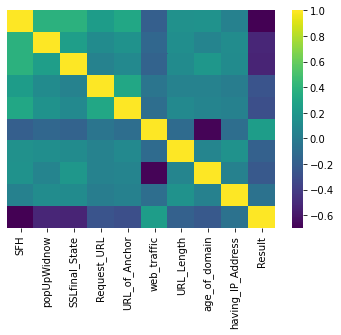

In [203]:
import seaborn as sns
sns.heatmap(dados_cor, yticklabels=False, cbar=True, cmap='viridis')

**Iremos remover a coluna having_IP_address porque a correlação é próxima a zero**

In [0]:
del dados_phishing['having_IP_Address']

In [0]:
dados_tratados = dados_phishing.copy()

In [0]:
#dados_tratados = dados_phishing

In [146]:
dados_tratados

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,Result
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
1348,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0
1349,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,-1.0
1350,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0
1351,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,1.0


In [147]:
dados_tratados.isnull().sum()

SFH               0
popUpWidnow       0
SSLfinal_State    0
Request_URL       0
URL_of_Anchor     0
web_traffic       0
URL_Length        0
age_of_domain     0
Result            0
dtype: int64

In [148]:
dados_tratados['SFH'].unique()

array([ 1., -1.,  0.])

In [149]:
len(dados_tratados['SFH'].unique())

3

In [150]:
for i in range(0,9):
  print(dados_tratados.iloc[i].unique().shape)

(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)


In [152]:
dados_tratados

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,Result
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
1348,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0
1349,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,-1.0
1350,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0
1351,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,1.0


In [153]:
type(dados_tratados)

pandas.core.frame.DataFrame

**Separando dados e rótulos**

Apresentamos duas formas de fazer

**1a forma de fazer**

In [0]:
rotulo = dados_tratados['Result'].copy()

In [155]:
rotulo.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: Result, dtype: float64

In [0]:
dados = dados_tratados.copy()

In [0]:
del dados['Result']

In [160]:
dados.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0


In [161]:
dados_tratados.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,Result
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,1.0


**2a forma de fazer**

In [0]:
X_d = dados_tratados.iloc[:,0:-1]

In [171]:
X_d.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0


In [0]:
y_r = dados_tratados.iloc[:,-1]

In [173]:
y_r

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1348    1.0
1349   -1.0
1350    1.0
1351    1.0
1352   -1.0
Name: Result, Length: 1353, dtype: float64

**Explicando como funciona o parâmetro random_state**

In [0]:
array_a = [0,1,2,3,4,5,6,7,8,9]


In [0]:
import numpy as np

In [0]:
np.random.seed(0)

In [124]:
train_test_split(array_a, random_state=1)


[[4, 0, 3, 1, 7, 8, 5], [2, 9, 6]]

**CRIANDO AS BASES DE TREINO E TESTE**

**NOTA: Stratify balanceia os valores das classes**

In [0]:
dados_treino, dados_teste, rotulos_treino, rotulos_teste = train_test_split(X_d, y_r, test_size=0.3, stratify=y_r, random_state=1)

# **TREINAMENTO**

In [0]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# **Criar Modelo que será usado como Baseline: classificador regressão linear**

**Definição dos parâmetros do modelo de classificação utilizado**

In [0]:
# Não iremos usar penalty
# penalty = ['l1', 'l2', 'elasticnet', 'none']

In [0]:
s = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [0]:
tol = [1e-4, 1e-3, 1e-2, 1e-1]

In [0]:
C = [0.1, 1.0, 10.0]

**Iremos escolher o melhor modelo com base na métrica accuracy**

In [195]:
best_acc = 0
for s in solver:
  for t in tol:
    for c in C:
      clf_baseline = LogisticRegression(tol=t, solver=s, C=c)
      clf_baseline.fit(dados_treino, rotulos_treino)
      predictions = clf_baseline.predict(dados_treino)
      current_acc = metrics.accuracy_score(rotulos_treino, predictions)
      if current_acc > best_acc:
        best_acc = current_acc
        best_model = clf_baseline
        print(best_acc)

0.8479408658922915
0.8489968321013728


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [191]:
best_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predict_teste = best_model.predict(dados_teste)
predict_teste

In [199]:
metrics.accuracy_score(rotulos_teste, predict_teste)

0.7931034482758621

# **PARAMOS AQUI**

# **Fazer para RandomForest e comparar com a baseline: regressão linear**

In [0]:
clf_rf = RandomForestClassifier()


In [16]:
# Executar o comando a seguir para instalar o graphviz apenas uma vez
# !pip install graphviz

In [0]:
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

#fig, ax = plt.subplots(figsize=(20, 20))
#tree.plot_tree(clf, fontsize=14, feature_names=X_d, class_names=y_r)
#plt.show()

In [0]:
arvore = tree.DecisionTreeClassifier(criterion= 'entropy')

In [213]:
arvore

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [214]:
## Treinamento da árvore
arvore.fit(dados_treino, rotulos_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions_tree = arvore.predict(dados_treino)

In [220]:
acc_tree = metrics.accuracy_score(rotulos_treino, predictions_tree)
acc_tree

0.9640971488912354

In [0]:
predict_train_tree = arvore.predict(dados_treino)

In [224]:
predict_train_tree

array([-1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1.,  1.,  0.,  1., -1.,  0.,  1.,  1., -1., -1.,
        1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
        1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1., -1.,  0., -1., -1., -1., -1.,  1., -1.,  1.,
       -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  0.,  1.,
       -1.,  0., -1.,  1., -1.,  0.,  1., -1.,  1., -1., -1.,  1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,
       -1., -1.,  1.,  0., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  0., -1., -1.,
       -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  0.,  1., -1.,  1.,
        1.,  1.,  0.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1

In [223]:
predict_train_tree.shape

(947,)

In [0]:
predict_test_tree = arvore.predict(dados_teste)

In [226]:
predict_test_tree

array([ 1.,  0., -1.,  0., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  0.,  1., -1.,  1.,  1., -1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  0.,  0.,
        1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  0., -1.,
        1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  0., -1.,  1.,  0.,
        1.,  0., -1.,  1.,  1., -1., -1.,  0., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1.,  0.,  1., -1.,  1.,  1.,  0.,  1.,  1., -1., -1., -1.,  1.,
       -1., -1.,  1.,  0., -1.,  1.,  1., -1.,  0.,  1.,  1., -1., -1.,
        1., -1., -1.,  1., -1.,  0., -1., -1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
        0., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1.,  0.,  0., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1

In [228]:
metrics.accuracy_score(rotulos_teste, predict_test_tree)

0.8497536945812808